## Nowadays shopping malls and Big Marts keep the track of their sales data of each and every individual item for predicting future demand of the customer and update the inventory management as well. These data stores basically contain a large number of customer data and individual item attributes in a data warehouse

## The aim is to build a predictive model and predict the sales of each product at a particular store.

### First am importing the libraries which i use in this project

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# Pandas - Dataframe operations like import/export, join, concat, reshape,
# index, etc.
# matplotlib.pyplot - Data Vizualization particulary if you want to alter
# plot window size, etc.
# Numpy - Array based operations. Array are fundamental datastructure and
# start & end with [] or square brackets, elements seperated by comma.
# Subpackages in Numpy
# scipy.stats - statistics
# statsmodels - Time Series

In [90]:
import io
%cd "C:\Users\HP\Desktop\python\bigmart sales files"

C:\Users\HP\Desktop\python\bigmart sales files


### loading the train and test datasets using pandas

In [91]:
bigmarttrain=pd.read_csv('train_v9rqX0R.csv')

In [92]:
bigmarttest=pd.read_csv('test_AbJTz2l.csv')

In [93]:
# reading the train data using pandas
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [94]:
bigmarttrain.head() # First 5 Rows of Data 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [95]:
bigmarttrain.tail() # Last 5 Rows Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [96]:
bigmarttrain.dtypes
# Individual Data Types - float64, int64, number, object

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [97]:
bigmarttrain.shape # Number of Rows or Observations & Number of Variables

(8523, 12)

In [98]:
type(bigmarttrain)

pandas.core.frame.DataFrame

In [99]:
bigmarttrain.describe() # count, min, max, mean, Q1, Q2, Q3, Stdev
# Only on NUmerical Data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [100]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

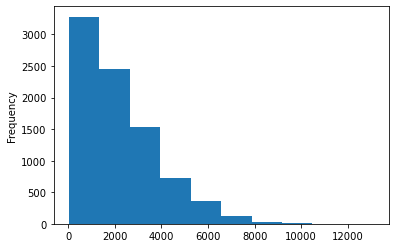

In [101]:
# Data Vizualization - pandas plot functions
bigmarttrain.Item_Outlet_Sales.plot(kind='hist') # Histogram

<AxesSubplot:>

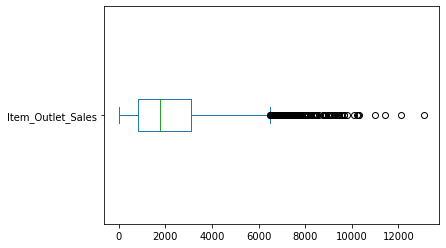

In [102]:
bigmarttrain.Item_Outlet_Sales.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

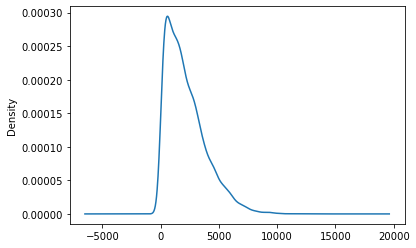

In [103]:
bigmarttrain.Item_Outlet_Sales.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

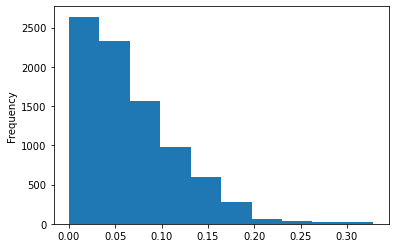

In [104]:
# Create Histogram, boxplot & Density Curve for Item_Visibility
bigmarttrain.Item_Visibility.plot(kind='hist')

<AxesSubplot:>

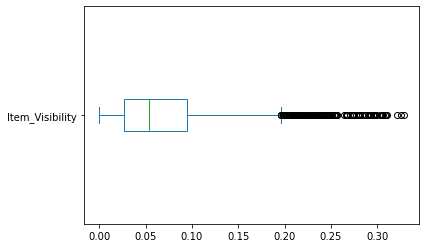

In [105]:
bigmarttrain.Item_Visibility.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

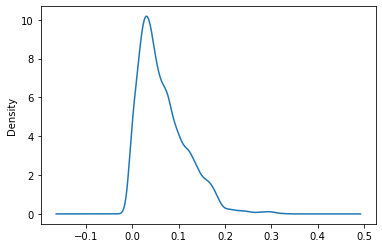

In [106]:
bigmarttrain.Item_Visibility.plot(kind='density')

In [107]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Type).mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [108]:
bigmarttrain.Item_MRP.groupby(bigmarttrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    140.870106
Tier 2    141.167196
Tier 3    140.935232
Name: Item_MRP, dtype: float64

In [109]:
bigmarttrain.Item_Visibility.groupby(bigmarttrain.Outlet_Size).median()

Outlet_Size
High      0.049587
Medium    0.048842
Small     0.057810
Name: Item_Visibility, dtype: float64

## Data Preprocessing

In [110]:
# In DataPreprocessing we check for Duplicate Varibles , check for single value columns min = max
# missing values: if we have above 70% of missing values then impute with word "missing"
# if we have less than 70% misisng - Numeric columns - mean or median, NonNumeric(or) categorical - MostFrequent
# Data Transformations:
# Dependent Variable - Skewness & Outliers
# Positive Skewness - Logarthmic Transformation or Square root transform
# negative Skewness - Exponential Transform or Power Transform
# Independent Variables
# Standard Scaler - (x-mean)/stdev, will give negative values
# Normalization or Min Max Scaler - (X-Xmin)/(Xmax-Xmin) gives only in
# range of 0 to 1. No negative values. 

In [111]:
bigmarttest['Item_Outlet_Sales']='test' # Adding a duplicate column in test data

In [112]:
# Row wise Concatenation of train & test data for preprocessing
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)

In [113]:
# for row concatination axis=0 and for column concatination axis=1

In [114]:
combinedf.shape

(14204, 12)

In [115]:
combinedf.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [116]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [117]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing") # here we are imputing NaN values with 'missing'

In [118]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(
    combinedf.Item_Weight.mean())

In [119]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [120]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [121]:
# Extract Item_Code from Item_Identifier
combinedf['Item_Code']=combinedf.Item_Identifier.apply(lambda x:x[0:2])

In [122]:
combinedf.Item_Code.value_counts() # FD - Food, NC-Non Consumable, Dr-Drinks

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [123]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [124]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [125]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [126]:
# Calculate Outlet_Age from Outlet_Establishment_Year as of 2021
combinedf['Outlet_Age']=2021-combinedf.Outlet_Establishment_Year

In [127]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

In [128]:
numericcolumns=combinedf[['Item_Weight','Item_Visibility','Item_MRP',
                         'Outlet_Age','Item_Outlet_Sales']]

In [129]:
objectcolumns=combinedf[['Item_Fat_Content','Item_Type','Outlet_Identifier',
                        'Outlet_Size', 'Outlet_Location_Type','Outlet_Type',
                        'Item_Code']]

In [130]:
objectcolumnsdummy=pd.get_dummies(objectcolumns,
                                 columns=['Item_Fat_Content','Item_Type',
                                          'Outlet_Identifier','Outlet_Size',
                                          'Outlet_Location_Type','Outlet_Type',
                                          'Item_Code'])

In [131]:
numericcolumns.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
Item_Weight,1.000000,-0.013641,0.033002,-0.000462
Item_Visibility,-0.013641,1.000000,-0.006351,0.083678
Item_MRP,0.033002,-0.006351,1.000000,-0.000141
Outlet_Age,-0.000462,0.083678,-0.000141,1.000000


In [132]:
import seaborn as sns

<AxesSubplot:>

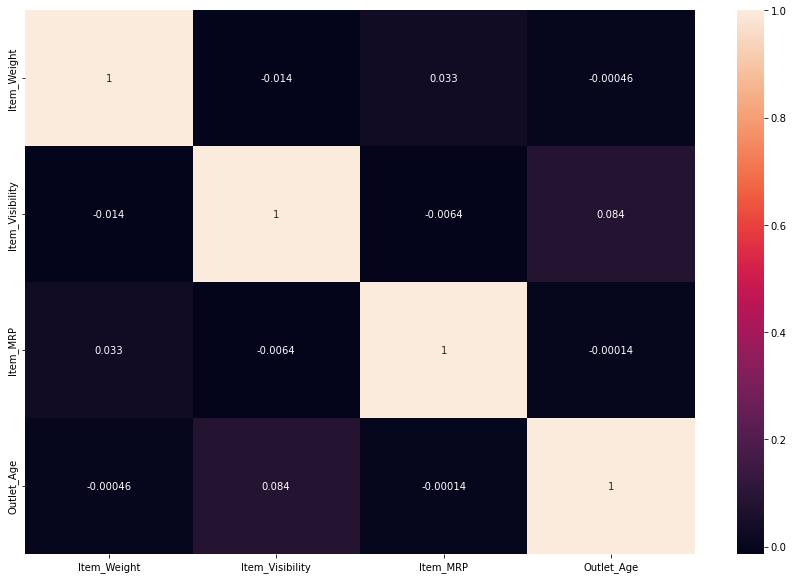

In [252]:
plt.figure(figsize=(15,10))
sns.heatmap(numericcolumns.corr(),annot=True)

In [134]:
# Columnwise Concatenation of Numeric Columns & Object Columns
combinedfclean=pd.concat([numericcolumns,objectcolumnsdummy],axis=1)

In [135]:
# Split Data into train and test
bigmarttraindf=combinedfclean[combinedfclean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedfclean[combinedfclean.Item_Outlet_Sales=='test']

In [136]:
# Drop Dependent Variable Item_Outlet_Sales from test Data
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [137]:
bigmarttraindf.Item_Outlet_Sales.dtype

dtype('O')

In [138]:
# Convert Dependent Variable 'Item_Outlet_Sales' as numeric from Object
bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')

C:\Users\HP\AppData\Local\Temp\ipykernel_19976\1600285798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')


In [139]:
bigmarttrain.Item_Fat_Content=bigmarttrain.Item_Fat_Content.replace(
['LF','low fat'],"Low Fat")

In [140]:
bigmarttrain.Item_Fat_Content=bigmarttrain.Item_Fat_Content.replace(
    'reg','Regular')

### Inferential Statistics - Hypothesis testing - Comaprision of Means or 
### Averages of 2 or more than 2 Groups/levels/Classes
### One Numerical - Other Categorical Variable with exactly 2 Levels -
### 2 Sample Independent t test
### One Numerical - Other Categorical with more than 2 levles -
### Anova Single Factor or One Way Anova
### Both Variables are Non Numeric & categorical - Chi Square Test of 
### Independence
### Both Variables are Numerical - Covariance & Correlation

In [141]:
# Only One Variable with exactly 2 levels - Item_Fat_Content
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Item_Fat_Content).var()

Item_Fat_Content
Low Fat    2.883115e+06
Regular    2.963496e+06
Name: Item_Outlet_Sales, dtype: float64

In [142]:
# Split data into Low Fat & Regular
lf=bigmarttrain[bigmarttrain.Item_Fat_Content=='Low Fat']
reg=bigmarttrain[bigmarttrain.Item_Fat_Content=="Regular"]

In [143]:
from scipy.stats import ttest_ind

In [144]:
ttest_ind(lf.Item_Outlet_Sales,reg.Item_Outlet_Sales,equal_var=False)

Ttest_indResult(statistic=-1.7212101304652165, pvalue=0.08526339464728244)

In [145]:
# the p value is >0.05 failed to reject null hypothesis( accept the null hypothesis)
# null-- their is significant difference between vraiables
# alter--their is no significant difference between vraiables

In [146]:
# Testing the  Null Average Item_Visibility of Low fat & Regular are equal
bigmarttrain.Item_Visibility.groupby(bigmarttrain.Item_Fat_Content).mean()

Item_Fat_Content
Low Fat    0.064330
Regular    0.069439
Name: Item_Visibility, dtype: float64

In [147]:
bigmarttrain.Item_Visibility.groupby(bigmarttrain.Item_Fat_Content).var()

Item_Fat_Content
Low Fat    0.002619
Regular    0.002726
Name: Item_Visibility, dtype: float64

In [148]:
ttest_ind(lf.Item_Visibility,reg.Item_Visibility,equal_var=False)

Ttest_indResult(statistic=-4.34668233685042, pvalue=1.404696156360228e-05)

In [149]:
# the p value is <0.05 reject null hypothesis
# null-- their is no significant difference between vraiables
# alter--their is significant difference between vraiables

In [150]:
bigmarttrain.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [151]:
# Testing the Null Average Item_Outlet_Sales for different Outlet_Type equal?
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Type).mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [152]:
gs=bigmarttrain[bigmarttrain.Outlet_Type=="Grocery Store"]
st1=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type1"]
st2=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type2"]
st3=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type3"]

In [153]:
from scipy.stats import f_oneway

In [154]:
f_oneway(gs.Item_Outlet_Sales,st1.Item_Outlet_Sales,st2.Item_Outlet_Sales,st3.Item_Outlet_Sales)

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [155]:
# the p value is <0.05 reject null hypothesis
# null-- their is significant difference between vraiables
# alter--their is no significant difference between vraiables

In [156]:
# Testing the Null Average Item_MRP of different Outlet_Type equal
bigmarttrain.Item_MRP.groupby(bigmarttrain.Outlet_Type).mean()

Outlet_Type
Grocery Store        140.294688
Supermarket Type1    141.213894
Supermarket Type2    141.678634
Supermarket Type3    139.801791
Name: Item_MRP, dtype: float64

In [157]:
f_oneway(gs.Item_MRP,st1.Item_MRP,st2.Item_MRP,st3.Item_MRP)

F_onewayResult(statistic=0.22025149361820015, pvalue=0.8823906488320122)

In [158]:
# the p value is >0.05 failed to reject null hypothesis(accept the null hypothesis)
# null-- their is significant difference between vraiables
# alter--their is no significant difference between vraiables

In [159]:
# Testing Null No Association/Relationship Between Both Variables
pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


In [160]:
from scipy.stats import chi2_contingency

In [161]:
chi2_contingency(pd.crosstab(bigmarttrain.Outlet_Type,
                              bigmarttrain.Outlet_Location_Type))

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598,  353.88419571,  425.67757832],
        [1562.58078141, 1822.35656459, 2192.062654  ],
        [ 260.00985568,  303.23594978,  364.75419453],
        [ 261.97113692,  305.52328992,  367.50557315]]))

In [162]:
# the p value is <0.05 reject null hypothesis
# null-- their is significant difference between vraiables
# alter--their is no significant difference between vraiables

In [163]:
# Testing Null No Association/Relationship Between Both Variables
pd.crosstab(bigmarttrain.Outlet_Size,bigmarttrain.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [164]:
chi2_contingency(pd.crosstab(bigmarttrain.Outlet_Size,
                            bigmarttrain.Outlet_Location_Type))

(4095.431263490629,
 0.0,
 4,
 array([[ 364.07917553,  141.78962866,  426.13119581],
        [1091.06559791,  424.9124816 , 1277.0219205 ],
        [ 932.85522657,  363.29788974, 1091.84688369]]))

In [165]:
# the p value is <0.05 reject null hypothesis
# null-- their is significant difference between vraiables
# alter--their is no significant difference between vraiables

In [166]:
# Split Data into dependent Variable(y) & Independet Variables(X)
y=bigmarttraindf.Item_Outlet_Sales
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)

<AxesSubplot:ylabel='Frequency'>

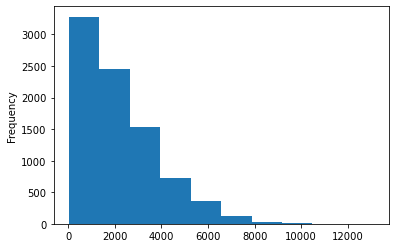

In [167]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

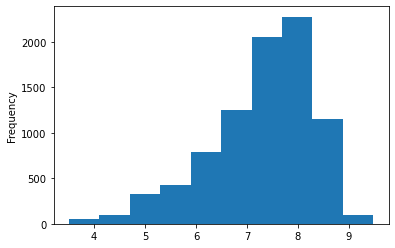

In [168]:
np.log(y).plot(kind='hist')

<AxesSubplot:>

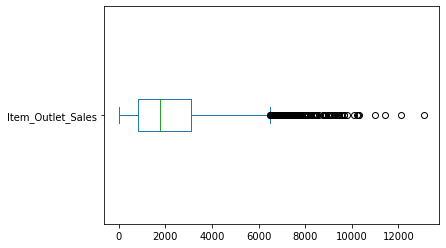

In [169]:
y.plot(kind='box',vert=False)

<AxesSubplot:>

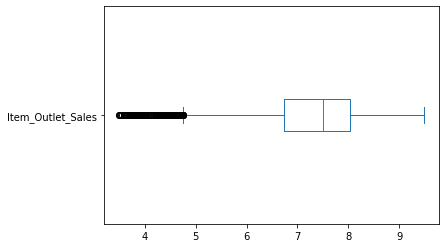

In [170]:
np.log(y).plot(kind='box',vert=False)

In [171]:
# Skewness & Kurtosis
print(bigmarttrain.Item_Outlet_Sales.skew())
print(bigmarttrain.Item_Outlet_Sales.kurt())

1.1775306028542796
1.6158766814287264


<AxesSubplot:ylabel='Density'>

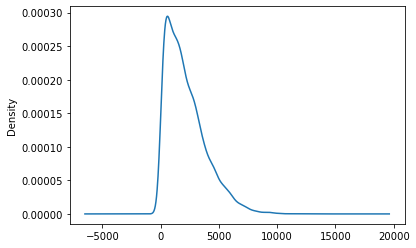

In [172]:
y.plot(kind='density')

<AxesSubplot:ylabel='Density'>

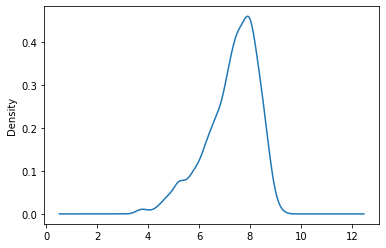

In [173]:
np.log(y).plot(kind='density')

## Model Building

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
reg=LinearRegression()

In [176]:
regmodel=reg.fit(X,y)

In [177]:
regmodel.score(X,y)

0.5637737001510252

In [178]:
# Poistive Skewness is corrected by using Logarthmic Transformation
regmodel2=reg.fit(X,np.log(y))

In [179]:
regmodel2.score(X,np.log(y))

0.7213876943174335

In [180]:
regpredict=regmodel.predict(X) # Predict 

In [181]:
regresidual=y-regpredict # Residual(Actualvalue-predicted value)

In [182]:
np.sqrt(np.mean(regresidual**2)) # RMSE

2763.3203381308226

In [183]:
regpredict2=regmodel2.predict(X) # Predict

In [184]:
regpredict2=np.exp(regpredict2)# convert back log to actual data

In [185]:
regresidual2=y-regpredict2 # residual

In [186]:
np.sqrt(np.mean(regresidual2**2))

1140.0278807236882

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
cross_val_score(regmodel,X,np.log(y),cv=5) # cross validation
# cv=5 means 5 subsets of randomly selected data and 5 testing of model

array([0.7205722 , 0.71009854, 0.70854769, 0.71488665, 0.74006189])

In [189]:
np.mean([0.7205722 , 0.71009854, 0.70854769, 0.71488665, 0.74006189])

0.718833394

In [190]:
regtestpredict=regmodel2.predict(bigmarttestdf)

In [191]:
regtestpredict=np.exp(regtestpredict)

In [192]:
regtestpredict

array([1431.69769892, 1137.13312846,  593.33677596, ..., 1468.27479033,
       3619.76045086, 1091.03184893])

In [193]:
pd.DataFrame(regtestpredict).to_csv("reg.csv")

##  DecisionTreeRegressor

In [194]:
from sklearn.tree import DecisionTreeRegressor

In [195]:
dt=DecisionTreeRegressor(max_depth=5)

In [196]:
dtmodel=dt.fit(X,y)

In [197]:
dtmodel.score(X,y)

0.6036222008273235

In [198]:
dtmodel2=dt.fit(X,np.log(y))

In [199]:
dtmodel2.score(X,np.log(y))

0.7404974231546005

In [200]:
dtpre=dtmodel.predict(X)

In [201]:
dtresidual=y-dtpre

In [202]:
np.sqrt(np.mean(dtresidual**2))

2763.3235995623722

In [203]:
dtpre2=dtmodel2.predict(X)

In [204]:
dtpredict2=np.exp(dtpre2)

In [205]:
dtresidual2=y-dtpredict2 # residual

In [206]:
np.sqrt(np.mean(dtresidual2**2))

1109.9195219878693

In [207]:
cross_val_score(dtmodel,X,np.log(y))

array([0.71962358, 0.71559636, 0.71739392, 0.7217384 , 0.75277106])

In [208]:
dttestpre=dtmodel2.predict(bigmarttestdf)

In [209]:
dttestpre=np.exp(dttestpre)

In [210]:
dttestpre

array([1405.46006897, 1121.16252711,  492.52097677, ..., 1736.20689331,
       3400.17400694, 1121.16252711])

In [211]:
pd.DataFrame(dttestpre).to_csv("dt.csv")

## RandomForestRegressor

In [212]:
from sklearn.ensemble import RandomForestRegressor

In [213]:
rf=RandomForestRegressor(max_depth=3,n_estimators=35)

In [214]:
rfmodel=rf.fit(X,y)

In [215]:
rfmodel.score(X,y)

0.5361953868788489

In [216]:
rfpre=rfmodel.predict(X)

In [217]:
rfresiduals=y-rfpre

In [218]:
np.sqrt(np.mean(rfresiduals**2))

1162.1127004081159

In [219]:
cross_val_score(rfmodel,X,y)

array([0.52394811, 0.54084121, 0.51171568, 0.55043049, 0.54072066])

In [220]:
np.mean([0.52203779, 0.54110113, 0.51483838, 0.55007301, 0.54540838])

0.534691738

In [221]:
rfmodel2=rf.fit(X,np.log(y))

In [222]:
rfmodel2.score(X,np.log(y))

0.7043733102880795

In [223]:
rfpre2=rfmodel2.predict(X)

In [224]:
rfres2=y-rfpre2

In [225]:
np.sqrt(np.mean(rfres2**2))

2763.362834230867

In [226]:
cross_val_score(rfmodel2,X,np.log(y))

array([0.69009648, 0.69404243, 0.68411884, 0.69540126, 0.72280745])

In [227]:
np.mean([0.68965349, 0.69378508, 0.6828677 , 0.69428976, 0.72289869])

0.6966989440000001

In [228]:
rftestpre=rfmodel2.predict(bigmarttestdf)

In [229]:
rftestpre=np.exp(rftestpre)

In [230]:
rftestpre

array([1446.70841243, 1363.47876666,  450.26752637, ..., 1898.71603445,
       3148.19671759, 1363.47876666])

In [231]:
pd.DataFrame(rftestpre).to_csv("rf.csv")

## Gradientboosting 

In [232]:
from sklearn.ensemble import GradientBoostingRegressor

In [233]:
gb=GradientBoostingRegressor(n_estimators=40)

In [234]:
gbmodel=gb.fit(X,y)

In [235]:
gbmodel.score(X,y)

0.6126827782851834

In [236]:
gbpre=gbmodel.predict(X)

In [237]:
gbres=y-gbpre

In [238]:
np.sqrt(np.mean(gbres**2))

1061.9745754437442

In [239]:
cross_val_score(gbmodel,X,y)

array([0.60653829, 0.58731713, 0.58013137, 0.60877662, 0.60732107])

In [240]:
np.mean([0.60675249, 0.58731713, 0.58013137, 0.60877662, 0.60732107])

0.5980597360000001

In [241]:
gbmodel2=gb.fit(X,np.log(y))

In [242]:
gbmodel2.score(X,np.log(y))

0.7453504589772595

In [243]:
gbpre2=gbmodel2.predict(X)

In [244]:
gbres2=y-gbpre2

In [245]:
np.sqrt(np.mean(gbres2**2))

2763.3359614863393

In [246]:
cross_val_score(gbmodel2,X,np.log(y))

array([0.73108382, 0.7283376 , 0.7290443 , 0.7313631 , 0.75882317])

In [247]:
np.mean([0.73108382, 0.7283376 , 0.7290443 , 0.7313127 , 0.75882317])

0.735720318

In [248]:
gbtestpre=gbmodel2.predict(bigmarttestdf)

In [249]:
gbtestpre=np.exp(gbtestpre)

In [250]:
pd.DataFrame(gbtestpre).to_csv("gb.csv")

In [254]:
report=pd.read_excel("C:/Users/HP/Desktop/bigmart table report.xlsx")

In [ ]:
# submitting the test predictions in the analytics vidya

In [255]:
report

,model,RMSE
0,Linear Regression,1231.690
1,Decission tree,1631.310
2,decission tree(25 max depth),1591.088
3,decission tree(90 max depth),1527.208
4,Random forest,1351.130
5,Gradient bossting,1197.824


In [257]:
min(report.RMSE)

1197.824

## I predeicted  test data in Analytics vidhya.Gradient Boosting is the best fit model.